<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/shingeonui/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

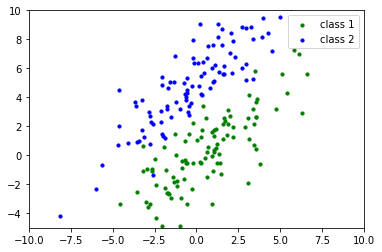

In [226]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np

np.random.seed(1)
N = 100

mean_c1 = np.array([0,0])
cov_c1 = np.array([[7,2], [2,7]])
rand_std_c1 = np.random.randn(N, 2)
class_c1 = rand_std_c1@np.sqrt(cov_c1)+mean_c1
rows, columns = class_c1.shape
class_label_list_1 = []
for i in range(rows):
  class_label_list_1.append([1,-1])
class_1_label = np.array(class_label_list_1)

mean_c2 = np.array([0,5])
cov_c2 = np.array([[7,4], [2,7]])
rand_std_c2 = np.random.randn(N, 2)
class_c2 = rand_std_c2@np.sqrt(cov_c2)+mean_c2
rows, columns = class_c2.shape
class_label_list_2 = []
for i in range(rows):
  class_label_list_2.append([-1,1])
class_2_label = np.array(class_label_list_2)

plt.xlim([-10,10])
plt.ylim([-5, 10])
line1 = plt.scatter(class_c1[:,0], class_c1[:,1], s=10, c="g", label="class 1")
line2 = plt.scatter(class_c2[:,0], class_c2[:,1], s=10, c="b", label="class 2")
plt.legend()
plt.show()

In [227]:
#함수 설정

def d_tanh(a):
  return (1-a)*(1+a)

def MLPtest(Xtst, Ttst, w, w0, v, v0):
  rows, columns = Xtst.shape

  E = np.zeros(N*2)
  Ytst = np.zeros((N*2,2))

  for i in range(N):
    x = Xtst[i,:]
    t = Ttst[i,:]
    uh=x@w+w0
    z=np.tanh(uh)
    uo=z@v+v0
    y = np.tanh(uo)
    
    e = y-t
    
    E[i] = e@e.T

    if y[0,0]>y[0,1]:
      Ytst[i,:] = [1,-1]
    else:
      Ytst[i,:] = [-1,1]
  
  SEtst = sum(np.power(E,2))/N        #평균제곱 오차 계산
  diffTY = sum(np.abs(Ttst-Ytst))/2    

  CEtst = diffTY[0]/N                 # 분류 오차 계산
  
  return [SEtst,CEtst]



In [228]:
data_all = np.vstack((class_c1, class_c2))
class_label = np.vstack((class_1_label, class_2_label))     #클래스 데이터

rows, columns = data_all.shape
data_num = rows                          # 데이터 수

INP = 2                           # 입력 뉴런 수
HID = 5                           # 은닉 뉴런 수
OUT = 2                           # 출력 뉴런 수

np.random.seed(2)
w = np.random.rand(INP, HID)*0.4 - 0.2           # 입력 -> 은닉 뉴런 가중치 초기화
w0 = np.random.rand(1, HID)*0.4 - 0.2            # 입력 -> 은닉 뉴런 bias 가중치 계산
v = np.random.rand(HID, OUT)*0.4 - 0.2           # 은닉 -> 출력 뉴런 가중치 초기화
v0 = np.random.rand(1, OUT)*0.4 - 0.2            # 은닉 -> 출력 뉴런 bias 가중치 계산

eta = 0.001                       # 학습률 설정
Mstep = 5000                      # 반복횟수 설정
Elimit = 0.03                     # 오차 한계 설정

Serr = []
Cerr = []
Step = []

print(w.shape, w0.shape, v.shape, v0.shape)


(2, 5) (1, 5) (5, 2) (1, 2)


0 1.8371469229041926 0.5
1 1.2500425171320046 0.5
2 0.872732338623115 0.5
3 0.6255528656963136 0.5
4 0.4597801124648842 0.5
5 0.3458437323920683 0.5
6 0.2656427185352662 0.5
7 0.20790800441345536 0.5
8 0.1654778256968292 0.5
9 0.1337005958710051 0.5
10 0.10948926399313703 0.5
11 0.09075230258717579 0.5
12 0.07604480023137394 0.5
13 0.06435024753874509 0.5
14 0.0549413513377033 0.5
15 0.04728955019101299 0.5
16 0.04100511349368183 0.5
17 0.03579680124977799 0.5
18 0.03144425553291346 0.5
19 0.027778817660580483 0.5
(20,) (20,)


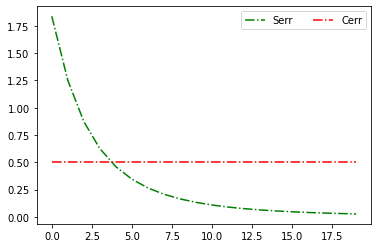

In [229]:
for j in range(Mstep):
  for i in range(N):
    x = data_all[i,:]                    
    t = class_label[i,:]
    
    uh =x@w+w0                         # 은닉뉴런 가중합 계산
    z = np.tanh(uh)                     # 하이퍼볼릭 탄젠트 함수로 은닉뉴런의 출력 계산
    
    uo = z@v+v0                         # 츌력 뉴런의 가중합 계산
    y = np.tanh(uo)                     # 하이퍼볼릭 탄젠트 함수로 출력 뉴런의 출력 계산

    e = y - t                           # 신경망 출력과 목표 출력의 차 계산
    
    # e*e.T       ???    
    delta_v = d_tanh(y)*e
    delta_w = d_tanh(z)*(delta_v@v.T)

    #print(v.shape,y.shape, z.shape, delta_v.shape, e.shape)
    v = v-eta*(delta_v.T@z).T              # 출력 뉴런의 가중치 수정
    v0 = v0-eta*(delta_v)                 # 출력 뉴런의 bias 가중치 수정

    w = w-eta*(delta_w.T@x.reshape(1,2)).T
    w0 = w0-eta*(delta_w)
  [serr, cerr]= MLPtest(data_all,class_label,w,w0,v,v0)
  print(j, serr, cerr)
    
  Serr.append(serr) 
  Cerr.append(cerr)
  Step.append(j)
  if serr<Elimit:
    break
numpy_Serr = np.array(Serr)
numpy_Cerr = np.array(Cerr)
numpy_Step = np.array(Step)

print(numpy_Serr.shape, numpy_Cerr.shape)
plt.plot(numpy_Step.reshape(-1), numpy_Serr.reshape(-1), '-.', color='g', label='Serr')
plt.plot(numpy_Step.reshape(-1), numpy_Cerr.reshape(-1), '-.', color='r', label='Cerr')
plt.legend(loc='upper right', ncol=4)
plt.show()  